# INTEGRATE example - Evidence

This notebook demonstrates howto compute an estimate of the evidence using the INTEGRATE package. 


In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # # # # # #%load_ext autoreload
    # # # # # # # # # #%autoreload 2
    pass

import integrate as ig
import h5py
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)

import numpy as np
import os
import matplotlib.pyplot as plt
showInfo = 1
hardcopy=True

Notebook detected. Parallel processing is OK


## Download the data for a specific case study

The following case study areas are available: 

* DAUGAARD
* FANGEL
* HALD


In [2]:
case = 'DAUGAARD'
case = 'FANGEL'
case = 'HALD'
case = 'HADERUP' # NOT YET AVAILABLE

files = ig.get_case_data(case=case)
f_data_h5_org = files[0]
file_gex= ig.get_gex_file_from_data(f_data_h5_org)
# check that file_gex exists
if not os.path.isfile(file_gex):
    print("file_gex=%s does not exist in the current folder." % file_gex)

Getting data for case: HADERUP
--> Got data for case: HADERUP


In [3]:
# Read 'D1/d_std' from f_data_h5, increase it by 100% and write it back to f_data_h5
f_data_h5 = f_data_h5_org
f_data_h5 = '%s_data.h5' % case

# Inflate noise such that noise floor is 5% and not 3%
if f_data_h5 != f_data_h5_org:
    ig.copy_hdf5_file(f_data_h5_org,f_data_h5, compress = True)
    with h5py.File(f_data_h5, 'a') as f:
        print(f['D1'].keys())
        d_std = f['D1/d_std'][:]
        d_std = d_std*5/3
        f['D1/d_std'][:] = d_std

print('CASE: %s' % case)
print('Using hdf5 data file %s with gex file %s' % (f_data_h5,file_gex))

<KeysViewHDF5 ['d_obs', 'd_std']>
CASE: HADERUP
Using hdf5 data file HADERUP_data.h5 with gex file TX07_Haderup_mean.gex


### Multiple hypothesis. 
Propose multiple hypothesis.


prior_model_layered: Saving prior model to prior_2l.h5


prior_model_layered: Saving prior model to prior_4l.h5


prior_model_layered: Saving prior model to prior_6l.h5


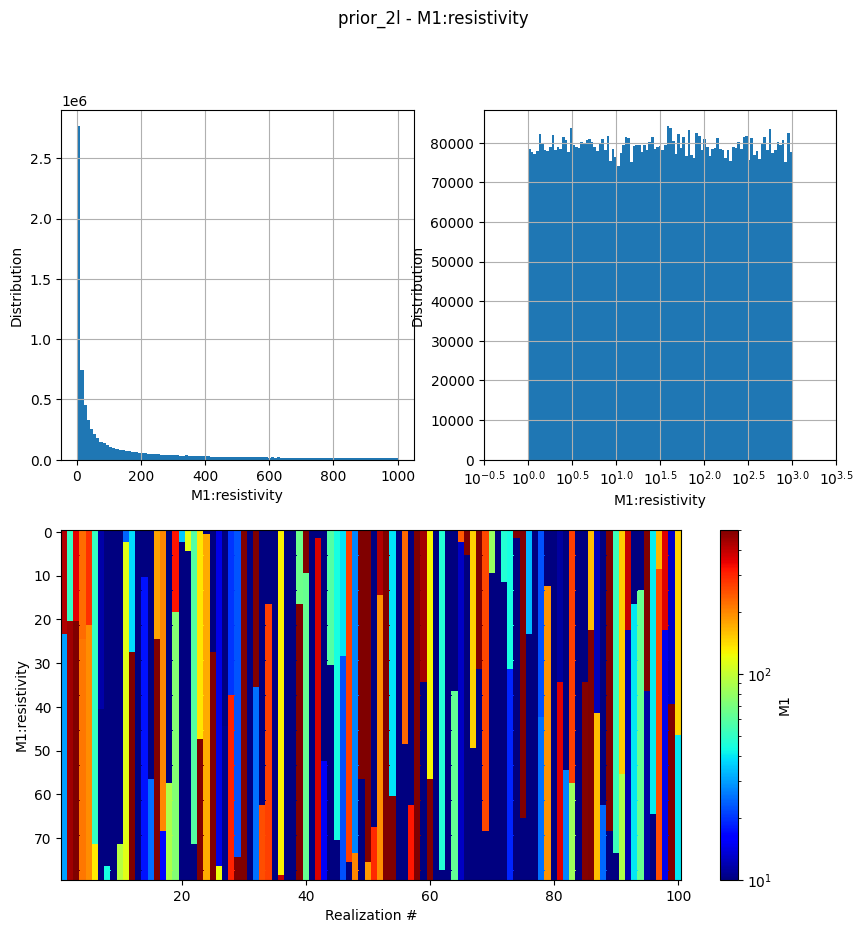

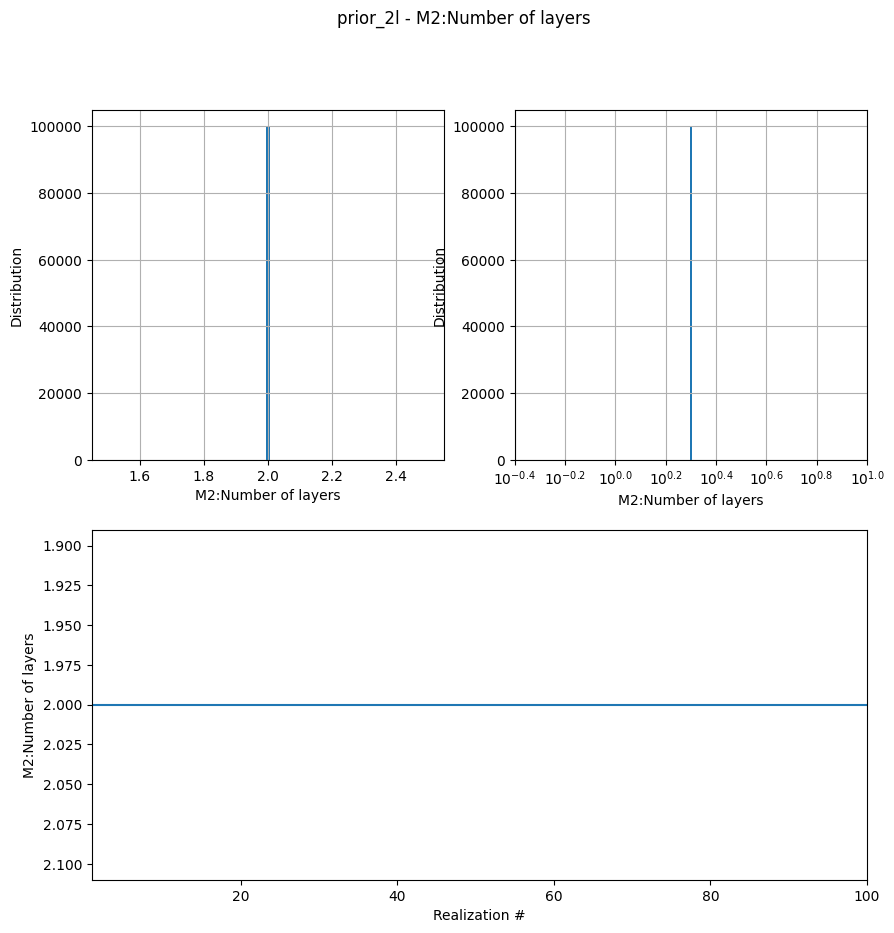

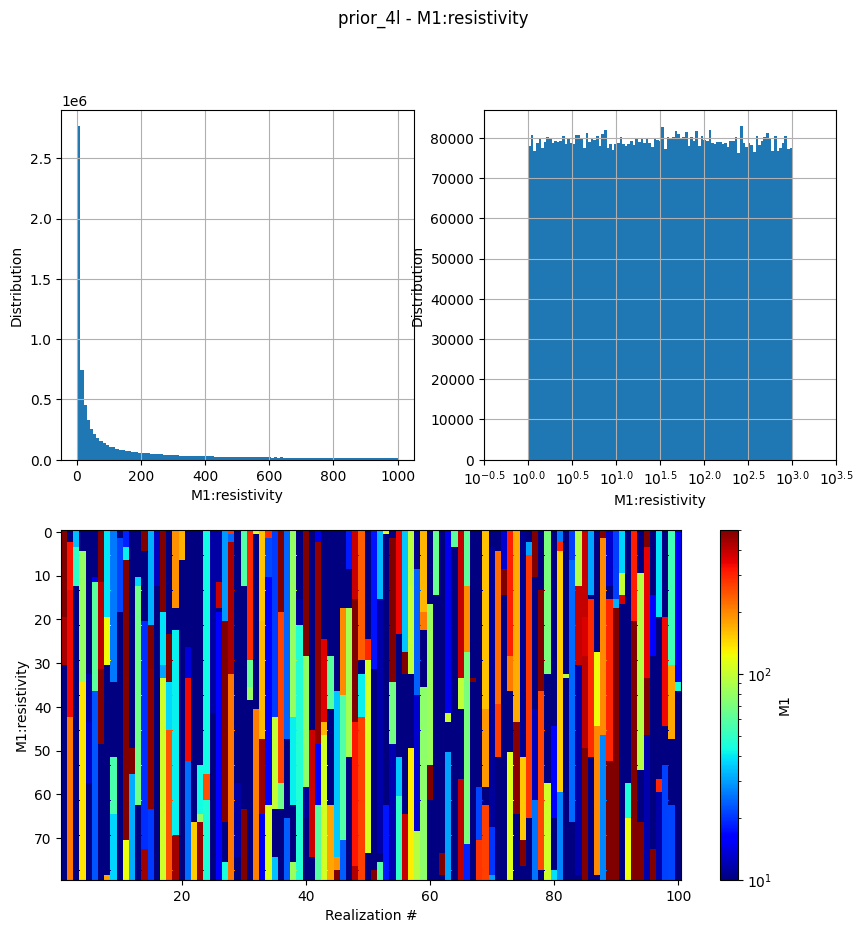

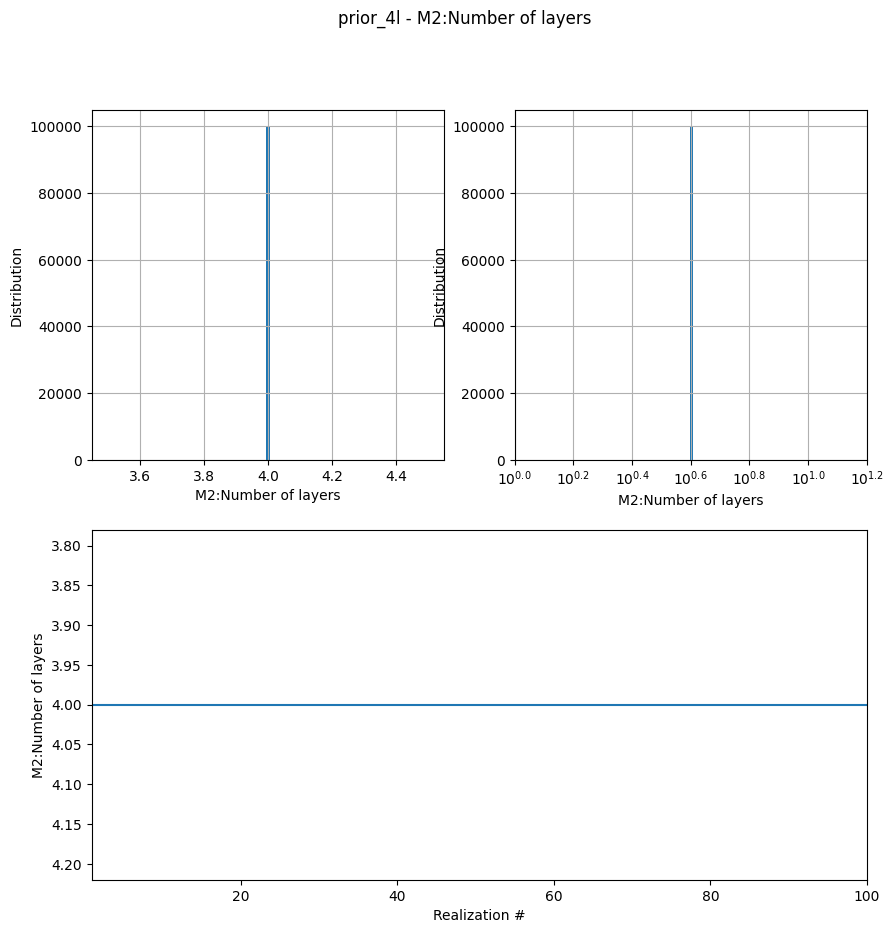

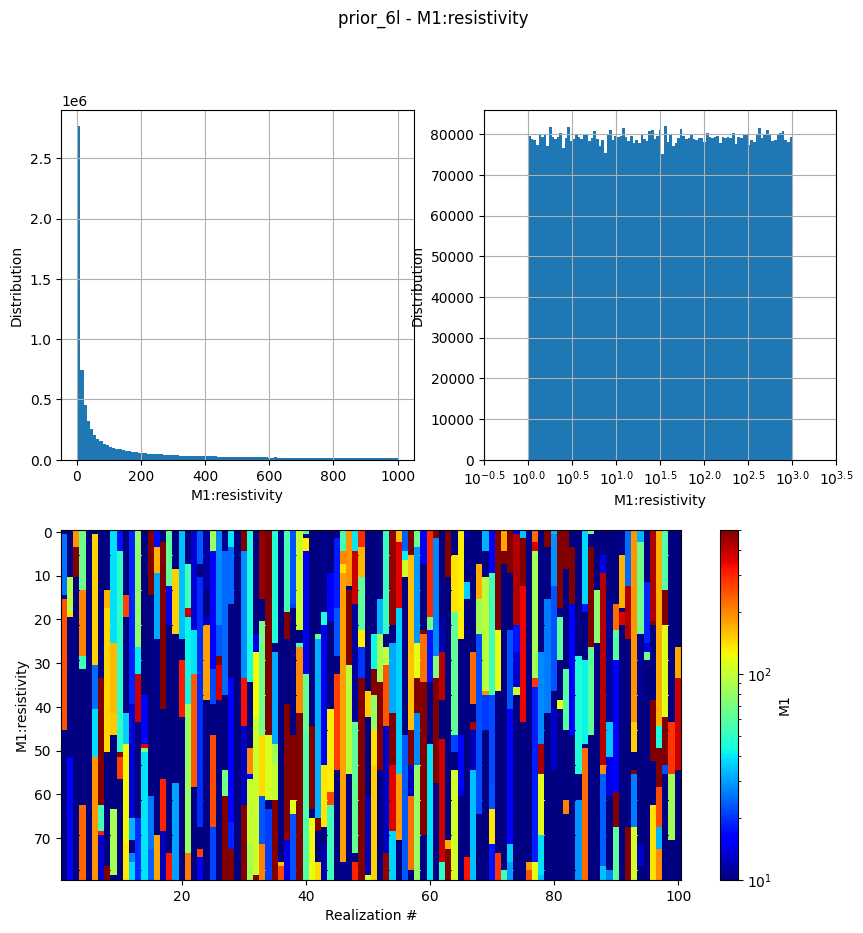

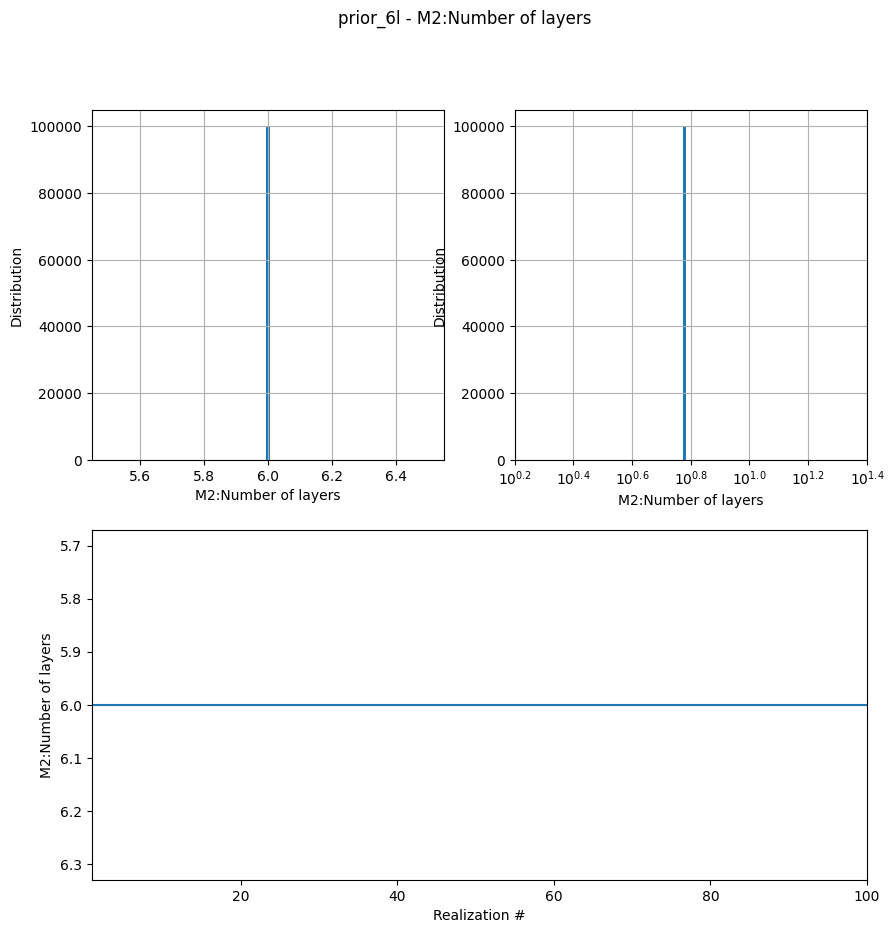

In [4]:
# A1. CONSTRUCT PRIOR MODEL OR USE EXISTING
N=100000
z_max = 80
RHO_min = 1
RHO_max = 1000
RHO_dist='log-uniform'

f_prior_h5_arr = []
hypothesis_name = []

## 1 layered model
NLAY_min=1
NLAY_max=1
f_prior_h5 = ig.prior_model_layered(N=N,
                                    lay_dist='uniform', z_max = z_max, 
                                    NLAY_min=NLAY_min, NLAY_max=NLAY_max, 
                                    RHO_dist=RHO_dist, RHO_min=RHO_min, RHO_max=RHO_max, f_prior_h5 = 'prior_1l.h5', showInfo=showInfo)
f_prior_h5_arr.append(f_prior_h5)
hypothesis_name.append('1 layer model')

## 2 layered model
NLAY_min=2
NLAY_max=2
f_prior_h5 = ig.prior_model_layered(N=N,
                                    lay_dist='uniform', z_max = z_max, 
                                    NLAY_min=NLAY_min, NLAY_max=NLAY_max, 
                                    RHO_dist=RHO_dist, RHO_min=RHO_min, RHO_max=RHO_max, f_prior_h5 = 'prior_2l.h5', showInfo=showInfo)
f_prior_h5_arr.append(f_prior_h5)
hypothesis_name.append('2 layered model')

## 4 layered model
NLAY_min=4
NLAY_max=4
f_prior_h5 = ig.prior_model_layered(N=N,
                                    lay_dist='uniform', z_max = z_max, 
                                    NLAY_min=NLAY_min, NLAY_max=NLAY_max, 
                                    RHO_dist=RHO_dist, RHO_min=RHO_min, RHO_max=RHO_max, f_prior_h5 = 'prior_4l.h5', showInfo=showInfo)
f_prior_h5_arr.append(f_prior_h5)
hypothesis_name.append('4 layered model')

## 6 layered model
NLAY_min=6
NLAY_max=6
f_prior_h5 = ig.prior_model_layered(N=N,
                                    lay_dist='uniform', z_max = z_max, 
                                    NLAY_min=NLAY_min, NLAY_max=NLAY_max, 
                                    RHO_dist=RHO_dist, RHO_min=RHO_min, RHO_max=RHO_max, f_prior_h5 = 'prior_6l.h5', showInfo=showInfo)
f_prior_h5_arr.append(f_prior_h5)
hypothesis_name.append('6 layered model')


## 4 layered model
#NLAY_deg = 4
#f_prior_h5 = ig.prior_model_layered(N=N,
#                                    lay_dist='chi2', z_max = z_max, NLAY_deg=NLAY_deg, 
#                                    RHO_dist=RHO_dist, RHO_min=RHO_min, RHO_max=RHO_max, f_prior_h5 = 'prior_chi4.h5', showInfo=showInfo)
#f_prior_h5_arr.append(f_prior_h5)
#hypothesis_name.append('4 layered model (chi2)')

# ## 4 layered model
# NLAY_deg = 4
# #RHO_min = 10
# f_prior_h5 = ig.prior_model_layered(N=N,
#                                     lay_dist='chi2', z_max = z_max, NLAY_deg=NLAY_deg, 
#                                     RHO_dist=RHO_dist, RHO_min=RHO_min, RHO_max=RHO_max, f_prior_h5 = 'prior_chi4_10.h5', showInfo=showInfo)
# f_prior_h5_arr.append(f_prior_h5)


for f_prior_h5 in f_prior_h5_arr:
    ig.plot_prior_stats(f_prior_h5)

### Generate prior data


In [ ]:
f_prior_data_h5_arr = []
for f_prior_h5 in f_prior_h5_arr:
    f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, Ncpu=0, N=N)
    f_prior_data_h5_arr.append(f_prior_data_h5)

Creating a copy of prior_2l.h5
                as prior_2l_TX07_Haderup_mean_Nh280_Nf12.h5
prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:  79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 2464/3125 [00:57<00:17, 37.51it/s]

## Perform inversion for multiuple lookup table sizes

In [ ]:
nprior = len(f_prior_data_h5_arr)

i1=7600
i2=8600
    
# # Narr should an array from 10 to N, in nstep in logspace
N1=100
logN1=  np.log10(N1)
logN = np.log10(N)
nsteps=int(np.ceil(logN-logN1))+1
nsteps = nsteps + nsteps-1
N_use_arr = np.logspace(2, np.log10(N), num=nsteps, dtype=int)
N_use_arr = [N]
print(N_use_arr)

EV_all = []
T_all = []
f_post_h5_all_arr = []
for N_use in N_use_arr:
    EV_arr = []
    f_post_h5_arr = []
    # Loop over the prior models, and perform the inversion
    for f_prior_data_h5 in  f_prior_data_h5_arr:
        print("N_use=%d" % N_use)
        f_post_h5 = ig.integrate_rejection(f_prior_data_h5, f_data_h5, parallel=parallel, Ncpu=8, N_use = N_use, updatePostStat=False)
        ig.plot_profile(f_post_h5, i1=i1, i2=i2, hardcopy=True, im=1)
        f_post_h5_arr.append(f_post_h5)
        f_post_h5_all_arr.append(f_post_h5)

        # read T
        with h5py.File(f_post_h5, 'r') as f:
            T = f['T'][:]
            T_all.append(T)

    # Get the probability (and log-evidence) for each of the four hypothesis
    P_hypothesis, EV_hypothesis,  MODE_hypothesis, ENT_hypothesis  = ig.get_hypothesis_probability(f_post_h5_arr)
    #P_hypothesis, EV_hypothesis = get_hypothesis_probability(f_post_h5_arr)
    # Plot a cumulative probability profile for the hypothesis
    ig.plot_cumulative_probability_profile(P_hypothesis, i1=i1, i2=i2,label=hypothesis_name, name ='hyp_prob_N%d' %(N_use))
    #ig.plot_cumulative_probability_profile(P_hypothesis, i1=i1, i2=i2)
    

    #  
    import matplotlib.pyplot as plt
    from scipy import stats
    X, Y, LINE, ELEVATION = ig.get_geometry(f_post_h5)

    n_hypothesis = P_hypothesis.shape[0]
    plt.figure(figsize=(12, 12))
    plt.subplot(1,1,1)
    from matplotlib.colors import BoundaryNorm, ListedColormap
    # Create discrete colormap with n_hypothesis colors
    colors = plt.cm.jet_r(np.linspace(0, 1, n_hypothesis))
    cmap = ListedColormap(colors)
    # Create boundaries for each hypothesis
    bounds = np.arange(0.5, n_hypothesis + 1.5, 1)
    norm = BoundaryNorm(bounds, cmap.N)
    scatter = plt.scatter(X, Y, c=MODE_hypothesis+1, s=5, cmap=cmap, alpha=1-ENT_hypothesis, norm=norm)
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.grid()
    # Add discrete colorbar with labels
    cbar = plt.colorbar(scatter, ticks=range(1, n_hypothesis+1))
    cbar.set_label('Hypothesis')
    plt.title('Posterior mode of hypotheses')
    plt.savefig('hypothesis_mode_N%d.png' % (N_use), dpi=300)
    # Plot teh entorpy of the sigma(m|d,Hypothesis)
    plt.figure(figsize=(12, 12))
    scatter = plt.scatter(X, Y, c=ENT_hypothesis, s=5, vmin = -.05, vmax=1.0, alpha=1, cmap='hot_r')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.colorbar(scatter, label='Hypotheisis Entropy')
    plt.grid()
    plt.savefig('hypothesis_entropy_N%d.png' % (N_use), dpi=300)

    plt.show()
    



## Combine mulitple hypotheses
rho(m) = pA*rho(m|hypotheses A) + pB*rho(m|hypotheses B) + pC*rho(m|hypotheses C) + ...

In [ ]:
# The the probability of each hypothrdiod using evidence
P_hypothesis, EV_hypothesis,  MODE_hypothesis, ENT_hypothesis  = ig.get_hypothesis_probability(f_post_h5_arr)

# Combine posterior arrays using P_hypothesis
M_post_arr = ig.sample_posterior_multiple_hypotheses(f_post_h5_arr, P_hypothesis)
# Combine posterior arrays using uniform hypothesis probability
# M_post_arr = ig.sample_posterior_multiple_hypotheses(f_post_h5_arr)


plt.imshow(M_post_arr[1], aspect='auto', interpolation='nearest', vmin=1, vmax=3)
#plt.imshow(M_post_arr[0][110], aspect='auto', interpolation='nearest', vmin=1, vmax=3)